# Ejercicio Regresion de SalePrice

## Configuración inicial del notebook

### Carga las librerías necesarias

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Carga el dataset

In [113]:
house_price_sample=pd.read_csv('Data/sample_submission.csv')

In [114]:
house_price_test = pd.read_csv('Data/test.csv')
house_price_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [115]:
house_price_train = pd.read_csv('Data/train.csv')
house_price_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [116]:
test_sample = pd.merge(house_price_sample, house_price_test, left_on='Id', right_on='Id', how='inner')
test_sample.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,169277.052498,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,187758.393989,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,183583.683570,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,179317.477511,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,150730.079977,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Analisis descriptivo

In [117]:
house_price_train.shape

(1460, 81)

In [118]:
house_price_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [119]:
house_price_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [120]:
house_price_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [121]:
house_price_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [122]:
house_price_train.mean(numeric_only=True)

Id                  730.500000
MSSubClass           56.897260
LotFrontage          70.049958
LotArea           10516.828082
OverallQual           6.099315
OverallCond           5.575342
YearBuilt          1971.267808
YearRemodAdd       1984.865753
MasVnrArea          103.685262
BsmtFinSF1          443.639726
BsmtFinSF2           46.549315
BsmtUnfSF           567.240411
TotalBsmtSF        1057.429452
1stFlrSF           1162.626712
2ndFlrSF            346.992466
LowQualFinSF          5.844521
GrLivArea          1515.463699
BsmtFullBath          0.425342
BsmtHalfBath          0.057534
FullBath              1.565068
HalfBath              0.382877
BedroomAbvGr          2.866438
KitchenAbvGr          1.046575
TotRmsAbvGrd          6.517808
Fireplaces            0.613014
GarageYrBlt        1978.506164
GarageCars            1.767123
GarageArea          472.980137
WoodDeckSF           94.244521
OpenPorchSF          46.660274
EnclosedPorch        21.954110
3SsnPorch             3.409589
ScreenPo

In [123]:
house_price_train.median(numeric_only=True)

Id                  730.5
MSSubClass           50.0
LotFrontage          69.0
LotArea            9478.5
OverallQual           6.0
OverallCond           5.0
YearBuilt          1973.0
YearRemodAdd       1994.0
MasVnrArea            0.0
BsmtFinSF1          383.5
BsmtFinSF2            0.0
BsmtUnfSF           477.5
TotalBsmtSF         991.5
1stFlrSF           1087.0
2ndFlrSF              0.0
LowQualFinSF          0.0
GrLivArea          1464.0
BsmtFullBath          0.0
BsmtHalfBath          0.0
FullBath              2.0
HalfBath              0.0
BedroomAbvGr          3.0
KitchenAbvGr          1.0
TotRmsAbvGrd          6.0
Fireplaces            1.0
GarageYrBlt        1980.0
GarageCars            2.0
GarageArea          480.0
WoodDeckSF            0.0
OpenPorchSF          25.0
EnclosedPorch         0.0
3SsnPorch             0.0
ScreenPorch           0.0
PoolArea              0.0
MiscVal               0.0
MoSold                6.0
YrSold             2008.0
SalePrice        163000.0
dtype: float

In [124]:
twenty_fifth = house_price_sample["SalePrice"].quantile(0.25)
median = house_price_sample["SalePrice"].median()
seventy_fifth = house_price_sample["SalePrice"].quantile(0.75)
maximum = house_price_sample["SalePrice"].max()

In [125]:
iqr=seventy_fifth-twenty_fifth
upper = seventy_fifth + (1.5 * iqr)
lower = twenty_fifth - (1.5 * iqr)

In [126]:
house_price_sample = house_price_sample[(house_price_sample["SalePrice"] < upper) & (house_price_sample["SalePrice"] > lower)]
print(upper, lower)

213919.00660578726 141573.41395900928


In [127]:
house_price_sample.select_dtypes(include='number').corr()['SalePrice'].sort_values(ascending=False)

SalePrice    1.000000
Id           0.116385
Name: SalePrice, dtype: float64

In [128]:
df_num = house_price_train.select_dtypes(include=['int64', 'float64'])

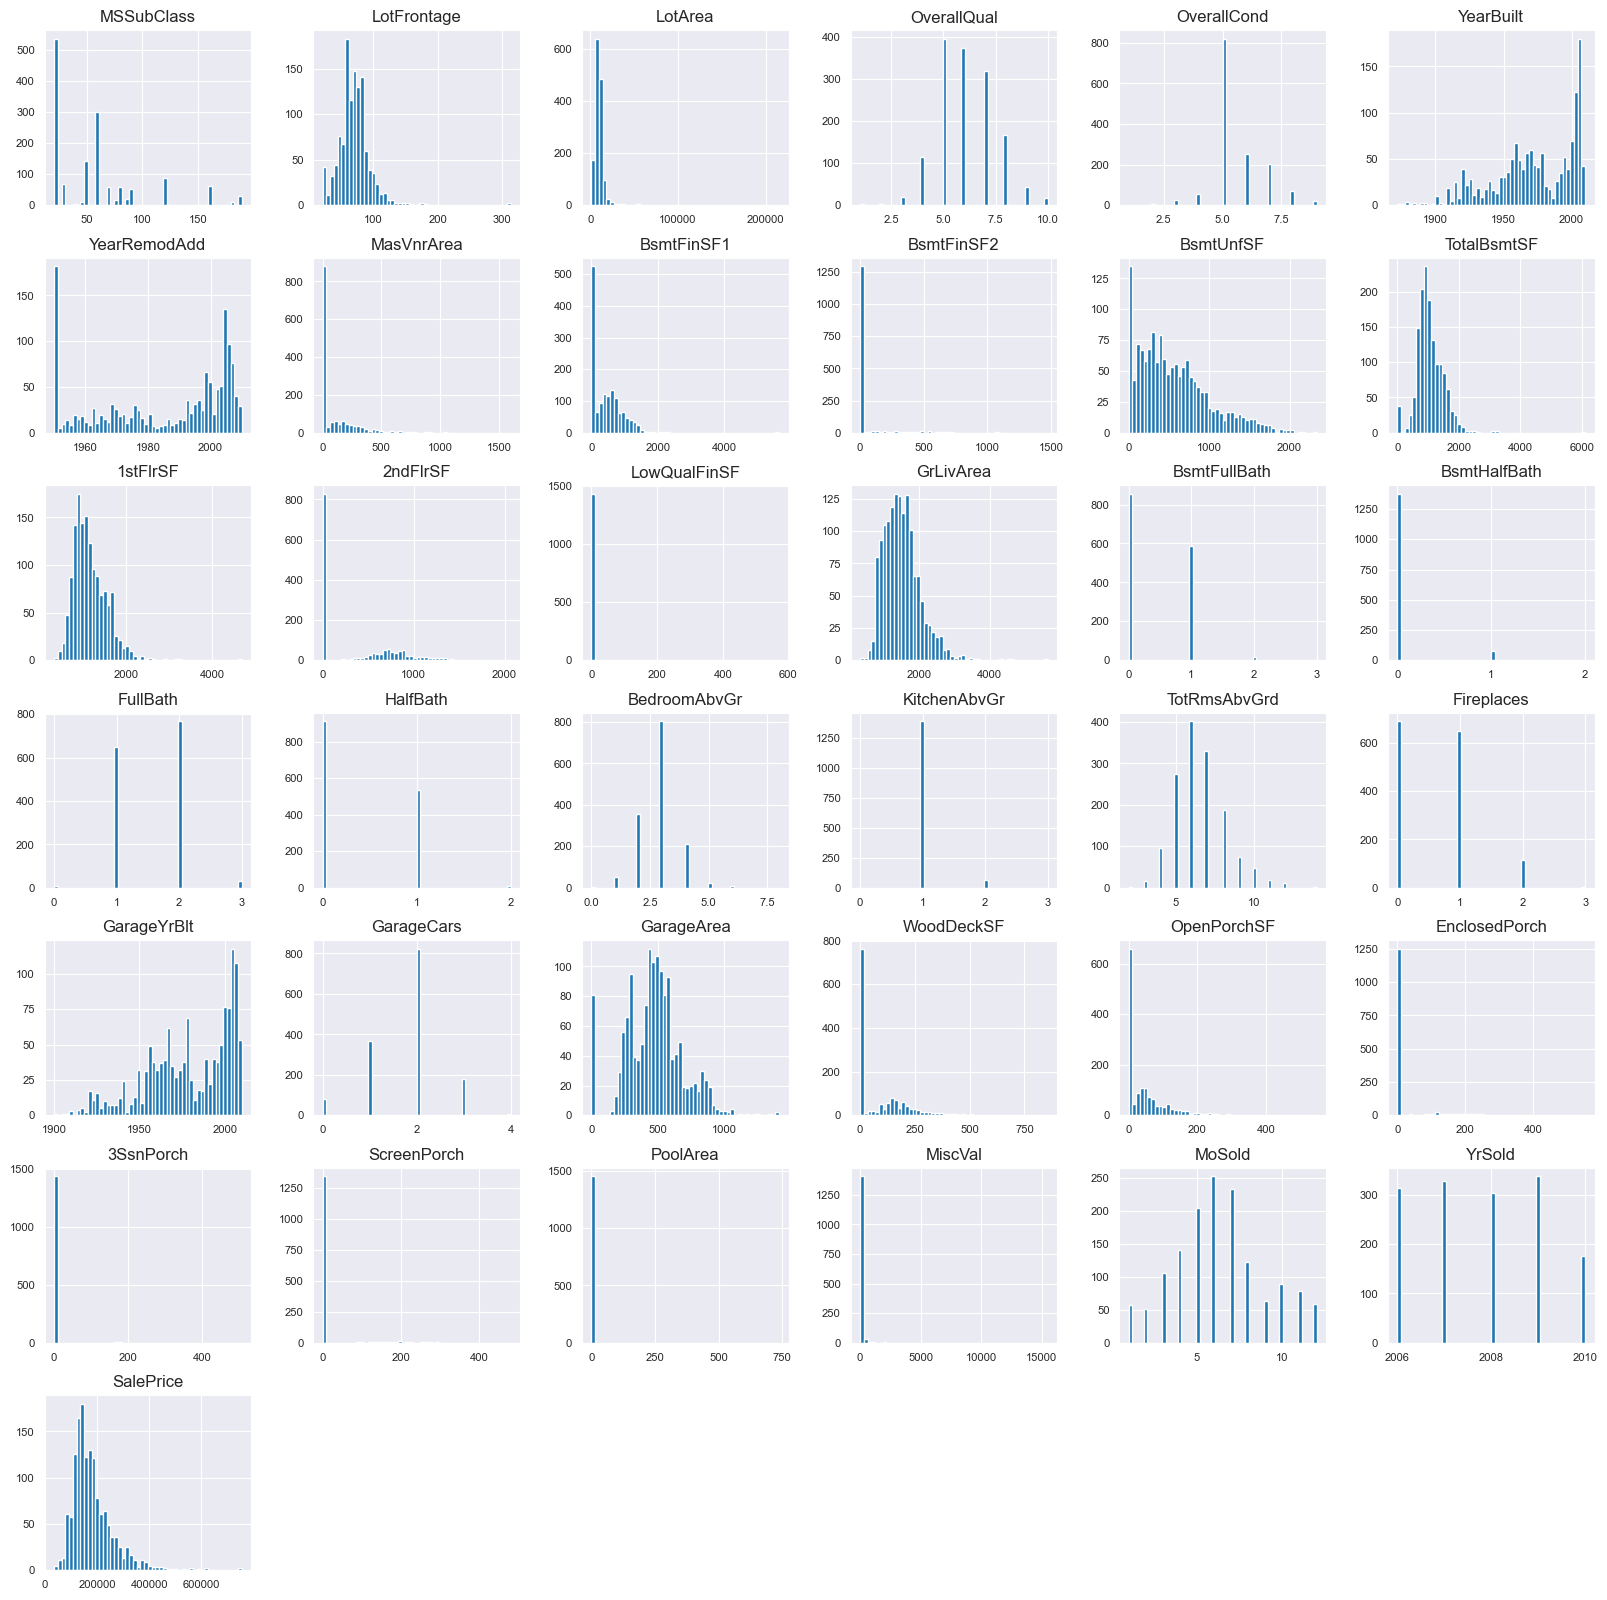

In [130]:
df_num.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8);

## Encontrar los valores faltantes

Debido a que son un total de 81 columnas, vamos a filtrar las columnas en las que hay valores faltantes

In [131]:
columns_with_missing = house_price_train.isna().sum()[house_price_train.isna().sum() > 0]
columns_with_missing.sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

### Borrar columnas con muchos valores faltantes

Esto se puede hacer de varias maneras, pero en este caso vamos a eliminar las columnas que tienen más del 30% de valores faltantes. Ademas eliminamos la columna Id, ya que no es relevante para el análisis.

In [132]:
threshold_colum = len(house_price_train) * 0.3
cols_to_drop = house_price_train.columns[house_price_train.isna().sum() > threshold_colum]
cols_to_drop = cols_to_drop.append(pd.Index(['Id']))
print(cols_to_drop)

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature',
       'Id'],
      dtype='object')


In [133]:
house_price_train.drop(columns=cols_to_drop, inplace=True)

#### Revisar el resultado de la eliminación de columnas

Ahora, vamos a revisar las columnas restantes para ver si hay columnas que tienen valores faltantes.

In [134]:
missing_values_after_drop = house_price_train.isnull().sum()
columns_with_missing_after_drop = missing_values_after_drop[missing_values_after_drop > 0]
columns_with_missing_after_drop

LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

### Imputar valores faltantes

#### Imputar valores numéricos

En este caso, vamos a imputar los valores faltantes con la media de la columna

In [135]:
house_price_train['LotFrontage'] = house_price_train['LotFrontage'].fillna(house_price_train['LotFrontage'].median())
house_price_train['MasVnrArea'] = house_price_train['MasVnrArea'].fillna(house_price_train['MasVnrArea'].median())
house_price_train['GarageYrBlt'] = house_price_train['GarageYrBlt'].fillna(house_price_train['GarageYrBlt'].median())

#### Imputar valores categóricos

En este caso, vamos a imputar los valores faltantes con la moda de la columna

In [136]:
categorical_columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in categorical_columns:
    house_price_train[col] = house_price_train[col].fillna(house_price_train[col].mode()[0])

#### Revisar el resultado de la imputación de valores faltantes

Por ultimo nos aseguramos de que no haya valores faltantes en el dataset

In [137]:
missing_values_after_clean = house_price_train.isnull().sum()
missing_values_after_clean = missing_values_after_clean[missing_values_after_clean > 0]
missing_values_after_clean

Series([], dtype: int64)

## Correlacion entre variables

### Entre variables numéricas

In [138]:
house_price_train_numeric = house_price_train.select_dtypes(include = ['float64', 'int64'])

In [139]:
house_price_train_numeric_corr = house_price_train_numeric.corr()['SalePrice'][:-1]
house_price_train_numeric_corr = house_price_train_numeric_corr[abs(house_price_train_numeric_corr) > 0.5].sort_values(ascending=False)
house_price_train_numeric_corr

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

### Entre variables categóricas

In [140]:
house_price_train_categorical = house_price_train.select_dtypes(include = ['object'])
house_price_train_categorical_encoded = pd.get_dummies(house_price_train_categorical, drop_first=True)
house_price_train_categorical_encoded['SalePrice'] = house_price_train['SalePrice']

In [141]:
house_price_train_categorical_corr = house_price_train_categorical_encoded.corr()['SalePrice'][:-1]
house_price_train_categorical_corr = house_price_train_categorical_corr[abs(house_price_train_categorical_corr) > 0.5].sort_values(ascending=False)
house_price_train_categorical_corr

GarageFinish_Unf   -0.513906
KitchenQual_TA     -0.519298
ExterQual_TA       -0.589044
Name: SalePrice, dtype: float64

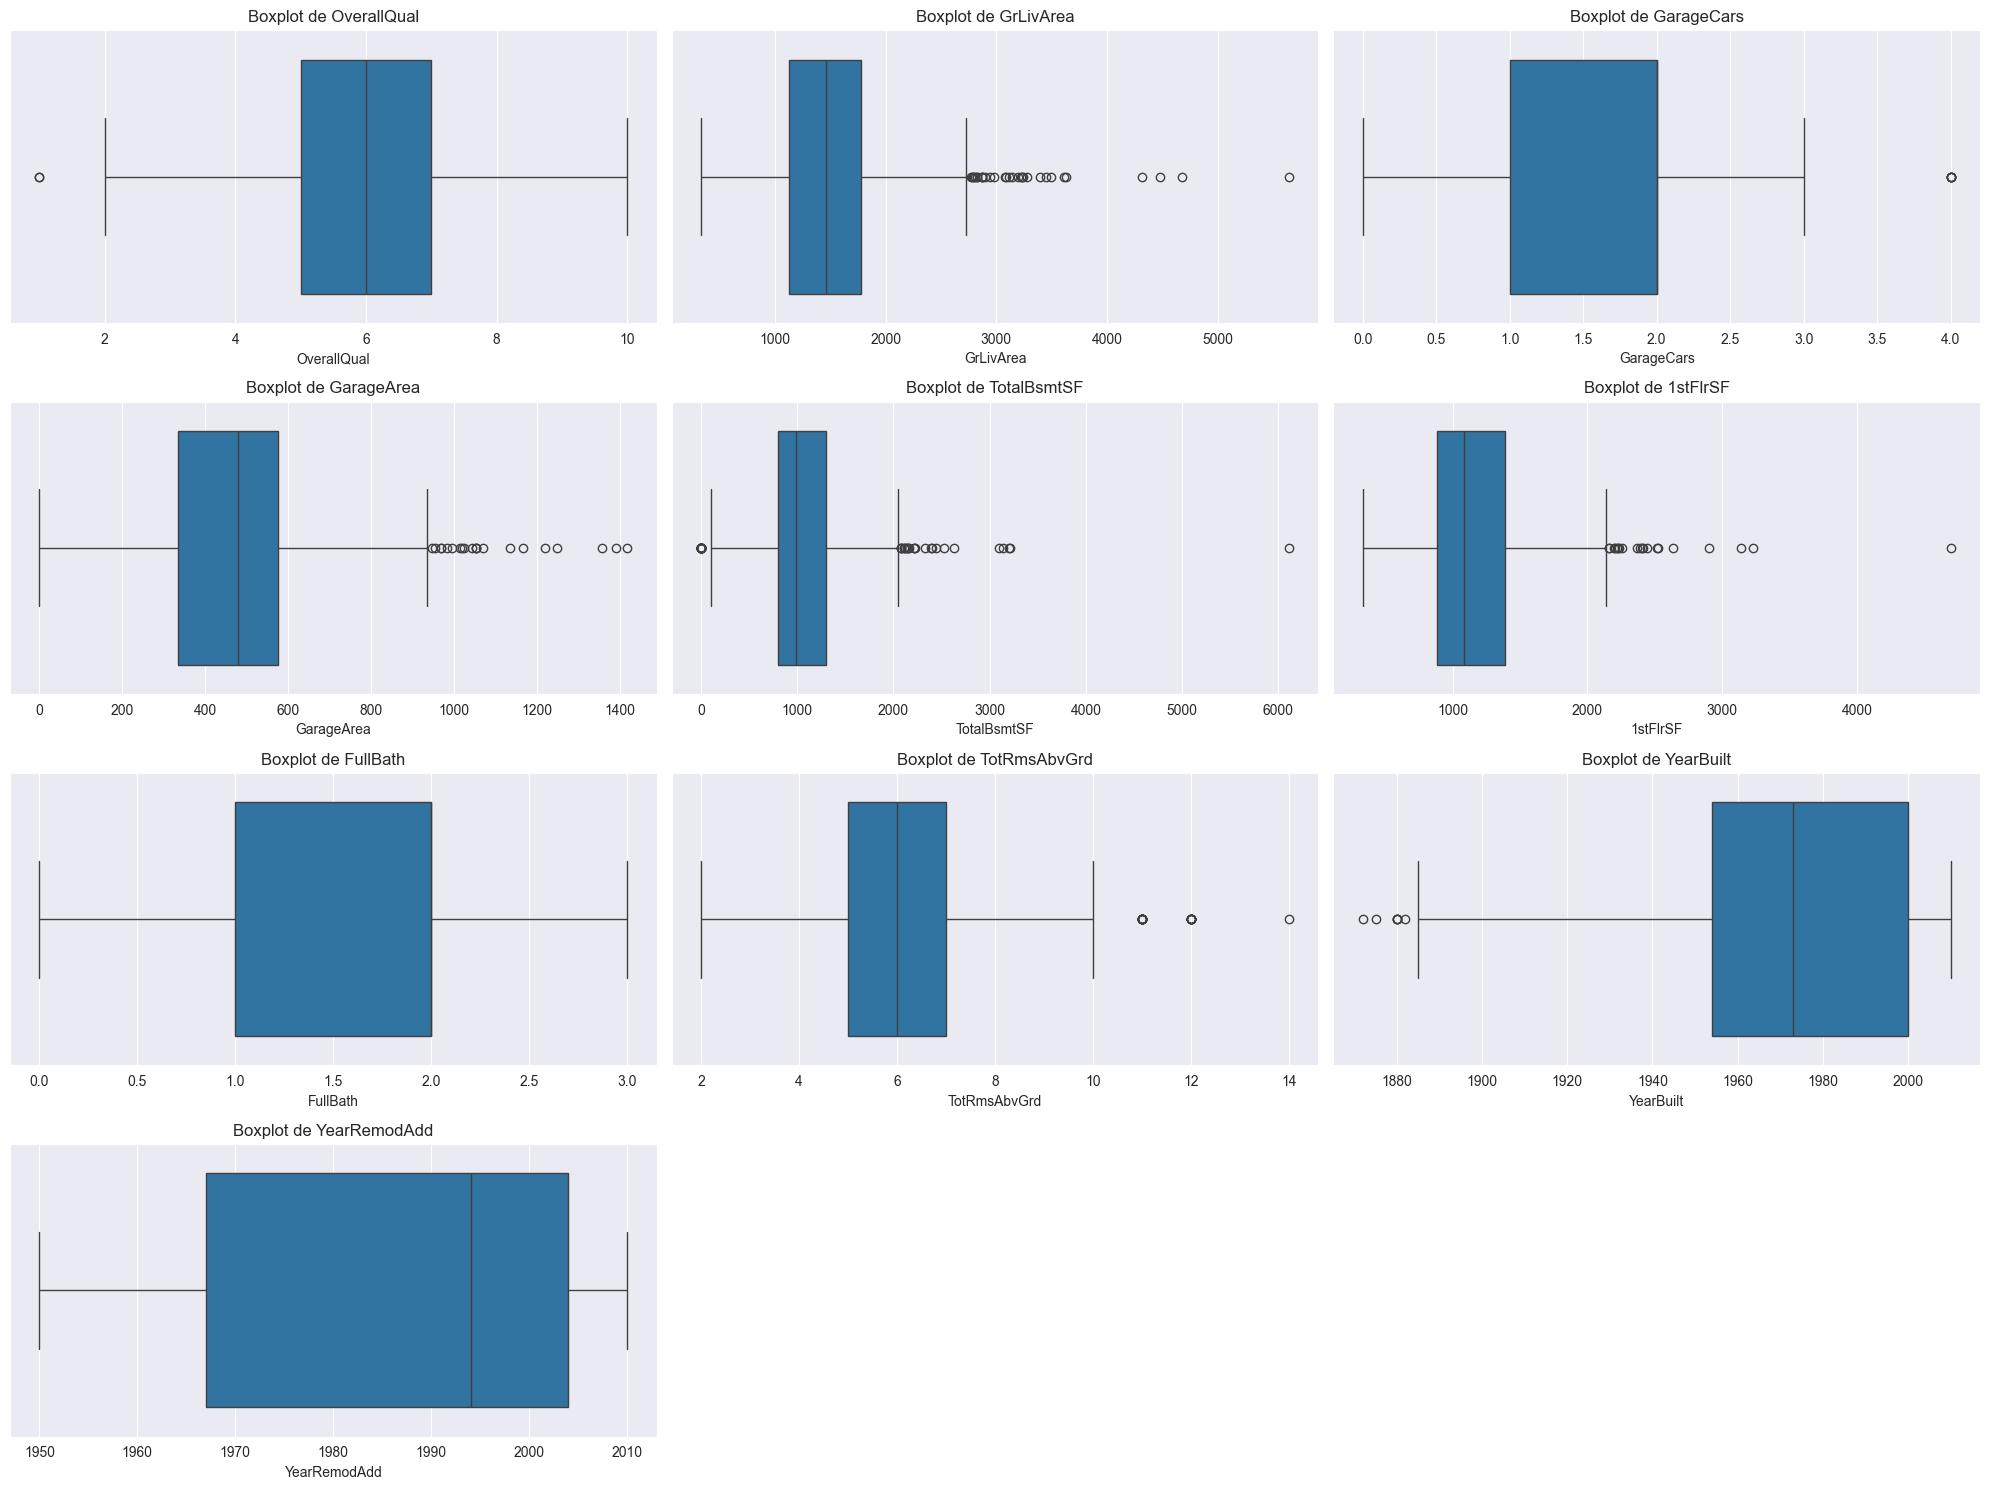

In [142]:

important_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
                      'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
                      'YearBuilt', 'YearRemodAdd']

# Boxplots para cada variable importante
plt.figure(figsize=(20, 15))
for i, feature in enumerate(important_features[1:], 1):  # Excluimos SalePrice para los boxplots
    plt.subplot(4, 3, i)
    sns.boxplot(x=house_price_train[feature])
    plt.title(f'Boxplot de {feature}')
plt.tight_layout()
plt.show()

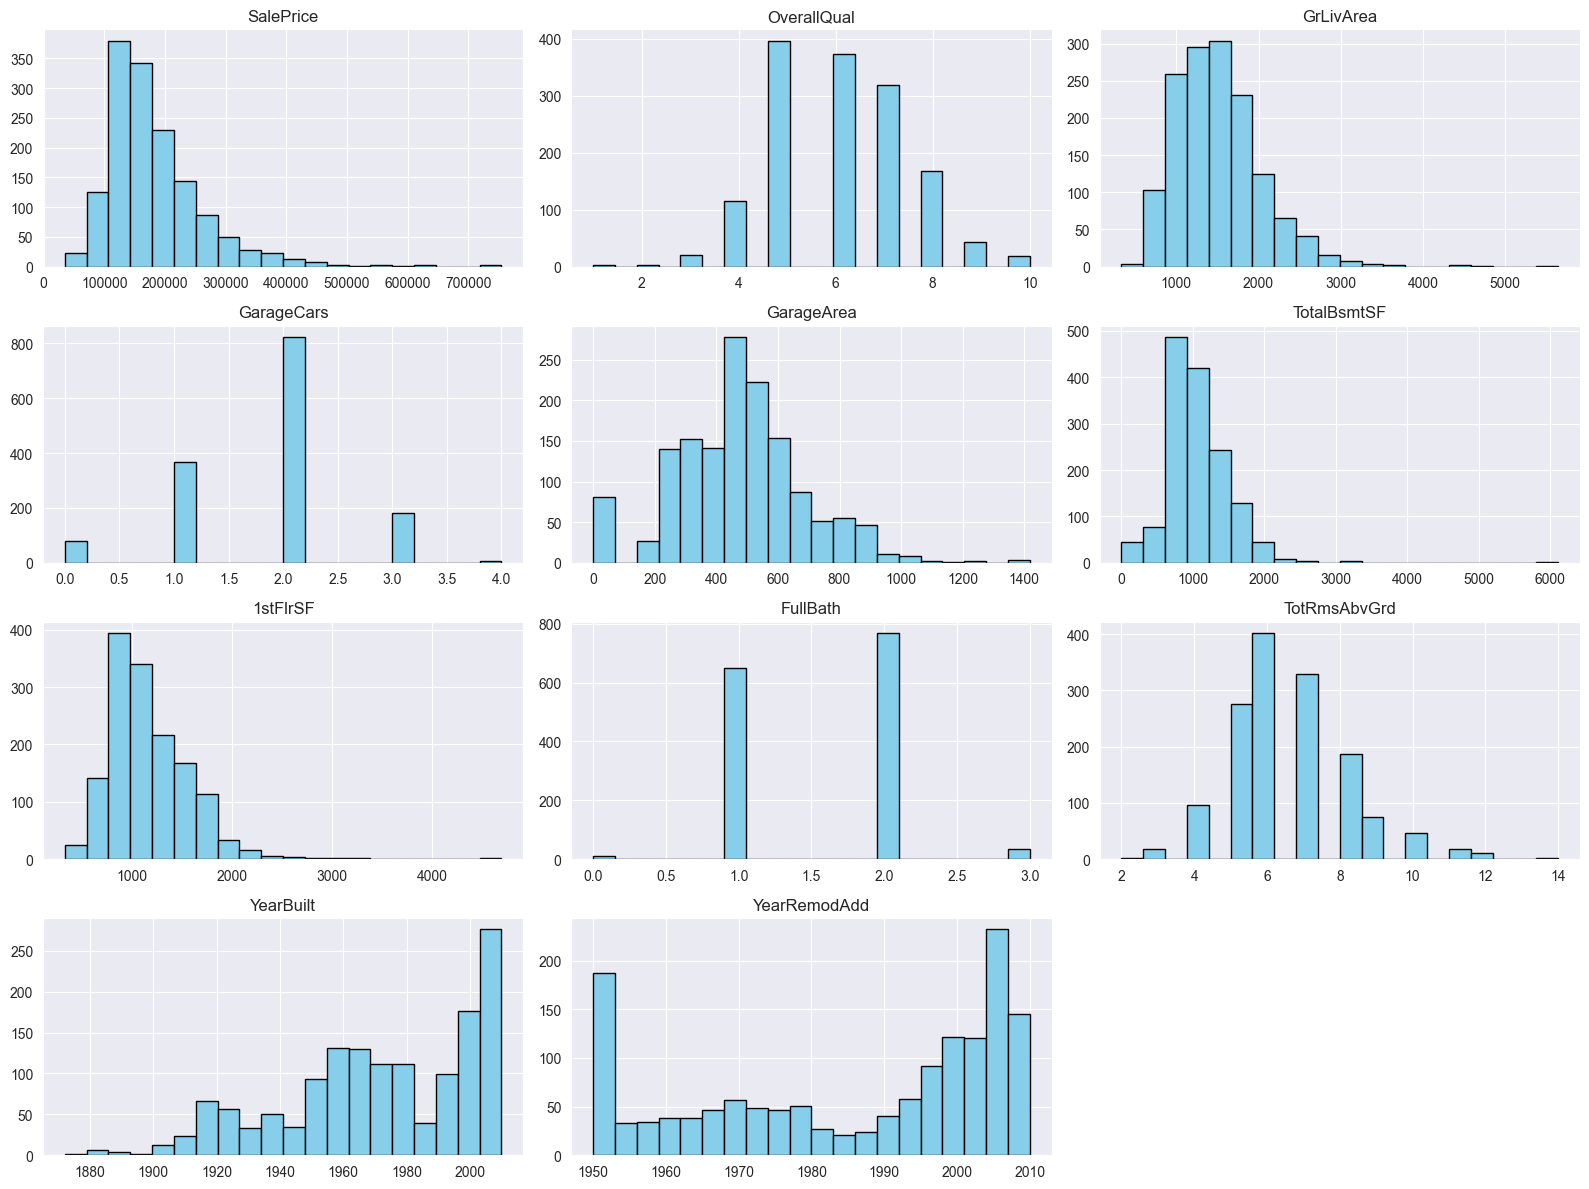

In [143]:
house_price_train[important_features].hist(bins=20, figsize=(16, 12), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

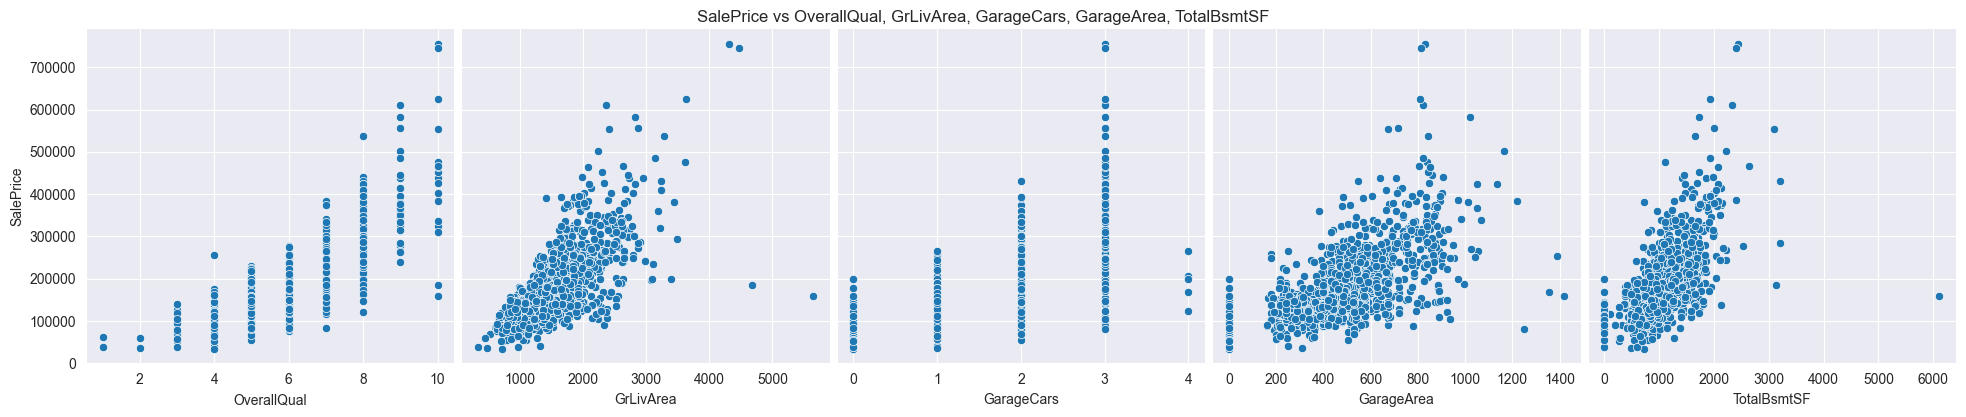

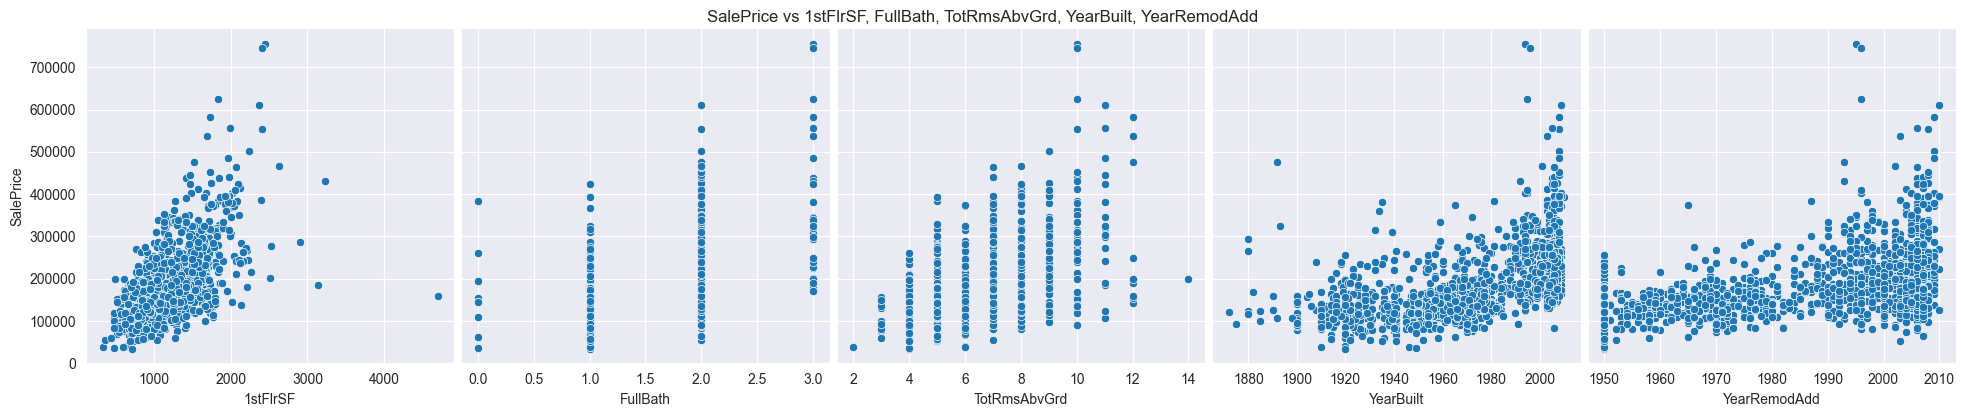

In [144]:
for i in range(1, len(important_features), 5):
    vars_chunk = important_features[i:i+5] 
    sns.pairplot(data=house_price_train,
                 x_vars=vars_chunk,
                 y_vars=['SalePrice'],
                 height=4)
    plt.suptitle(f'SalePrice vs {", ".join(vars_chunk)}', y=1.02)
    plt.show()

## Creacion del dataset final para el modelo

In [145]:
numeric_corr_array = np.array(house_price_train_numeric_corr.index)
categorical_corr_array = np.array(house_price_train_categorical_corr.index)

In [146]:
numeric_data = house_price_train[numeric_corr_array]
categorical_data = house_price_train_categorical_encoded[categorical_corr_array]
salePrice = house_price_train['SalePrice']

house_price_train_final = pd.concat([numeric_data, categorical_data, salePrice], axis=1)

house_price_train_final.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageFinish_Unf,KitchenQual_TA,ExterQual_TA,SalePrice
0,7,1710,2,548,856,856,2,8,2003,2003,False,False,False,208500
1,6,1262,2,460,1262,1262,2,6,1976,1976,False,True,True,181500
2,7,1786,2,608,920,920,2,6,2001,2002,False,False,False,223500
3,7,1717,3,642,756,961,1,7,1915,1970,True,False,True,140000
4,8,2198,3,836,1145,1145,2,9,2000,2000,False,False,False,250000


In [147]:
print(house_price_train_final.shape)
print(house_price_train_final.columns)
print(house_price_train_final.info())

(1460, 14)
Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'GarageFinish_Unf', 'KitchenQual_TA', 'ExterQual_TA', 'SalePrice'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   OverallQual       1460 non-null   int64
 1   GrLivArea         1460 non-null   int64
 2   GarageCars        1460 non-null   int64
 3   GarageArea        1460 non-null   int64
 4   TotalBsmtSF       1460 non-null   int64
 5   1stFlrSF          1460 non-null   int64
 6   FullBath          1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   YearBuilt         1460 non-null   int64
 9   YearRemodAdd      1460 non-null   int64
 10  GarageFinish_Unf  1460 non-null   bool 
 11  KitchenQual_TA    1460 non-null   bool 
 

### Guardar el dataset final

In [148]:
house_price_train_final.to_csv('Data/house_price_train_final.csv', index=False)

## Encontrar el mejor modelo

### TODO: Buscar el mejor modelo para predecir el precio de venta

## Aplicanción del modelo

### TODO: Aplicar el modelo a los datos de train (house_price)